**Table of contents**<a id='toc0_'></a>    
- [1-课堂画图](#toc1_)    
  - [常见激活函数](#toc1_1_)    
  - [2 用relu掰弯直线，保存为gif](#toc1_2_)    
  - [直接线性拟合作为对比-保存为GIF](#toc1_3_)    
  - [常见Loss函数](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[1-课堂画图](#toc0_)

## <a id='toc1_1_'></a>[常见激活函数](#toc0_)

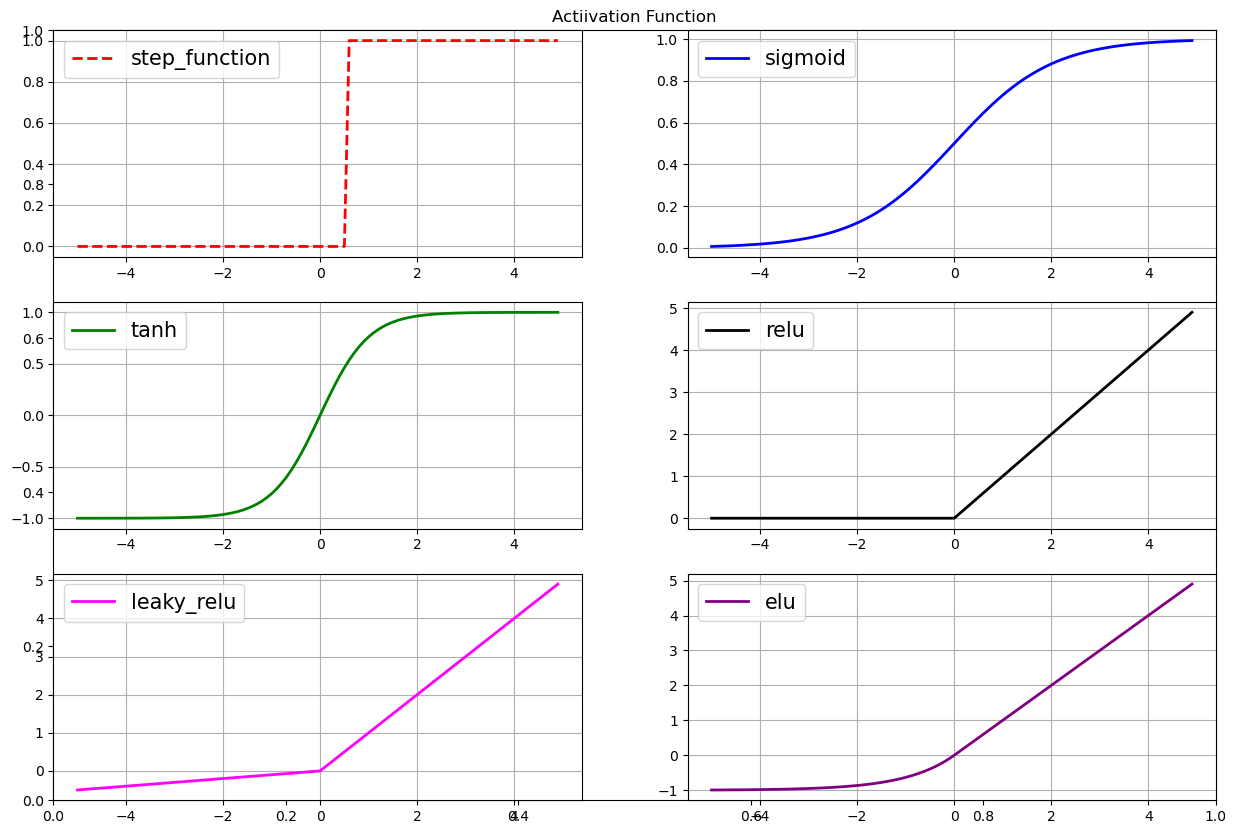

In [3]:
# 画出gif动图
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch

#定义阶梯函数，阈值伪0.58
def step_function(x):
    return np.array(x>0.58,dtype=np.float32)
#定义siemoid函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

#tanh
def tanh(x):
    return np.tanh(x)

#relu
def relu(x):
    return np.maximum(0,x)

#leaky_relu
def leaky_relu(x):
    return np.maximum(0.1*x,x)

#elu
def elu(x):
    x = torch.tensor(x)
    elu_y = F.elu(x,alpha=1.0)
    return elu_y
    # return np.maximum(0.1*(np.exp(x)-1),x)

#画出两个函数
x=np.arange(-5,5,0.1)   #x取值范围，0.1为步长
step=step_function(x)
sigmoid_y=sigmoid(x)
tanh_y=tanh(x)
relu_y=relu(x)
leaky_relu_y=leaky_relu(x)
elu_y=elu(x)


plt.figure(figsize=(15,10))   #设置画布大小
plt.title("Actiivation Function")   #画出表头


plt.subplot(321)
plt.plot(x,step,color='red',linestyle='--',label='step_function',linewidth=2.0)
plt.legend(loc='upper left',prop={'size':15})
#设置图例字体

plt.grid(True)  #显示网格

plt.subplot(322)
plt.plot(x,sigmoid_y,color='blue',linestyle='-',label='sigmoid',linewidth=2.0) 
plt.legend(loc='upper left',prop={'size':15})
plt.grid(True)  #显示网格 

plt.subplot(323)
plt.plot(x,tanh_y,color='green',linestyle='-',label='tanh',linewidth=2.0)
plt.legend(loc='upper left',prop={'size':15})
plt.grid(True)  #显示网格

plt.subplot(324)
plt.plot(x,relu_y,color='black',linestyle='-',label='relu',linewidth=2.0)
plt.legend(loc='upper left',prop={'size':15})
plt.grid(True)  #显示网格

plt.subplot(325)
plt.plot(x,leaky_relu_y,color='magenta',linestyle='-',label='leaky_relu',linewidth=2.0)
plt.legend(loc='upper left',prop={'size':15})
plt.grid(True)  #显示网格


plt.subplot(326)
plt.plot(x,elu_y,color='purple',linestyle='-',label='elu',linewidth=2.0)
plt.legend(loc='upper left',prop={'size':15})
plt.grid(True)  #显示网格



plt.savefig('activation_function.png')
plt.show()









## <a id='toc1_2_'></a>[2 用relu掰弯直线，保存为gif](#toc0_)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)
step:0  loss0.44198542833328247
step:20  loss0.08998318016529083
step:40  loss0.07068925350904465
step:60  loss0.04388800263404846
step:80  loss0.023498205468058586
step:100  loss0.013243032619357109
step:120  loss0.00915459357202053
step:140  loss0.007514591328799725
step:160  loss0.006700065918266773
step:180  loss0.006049921736121178
making gif....
done!


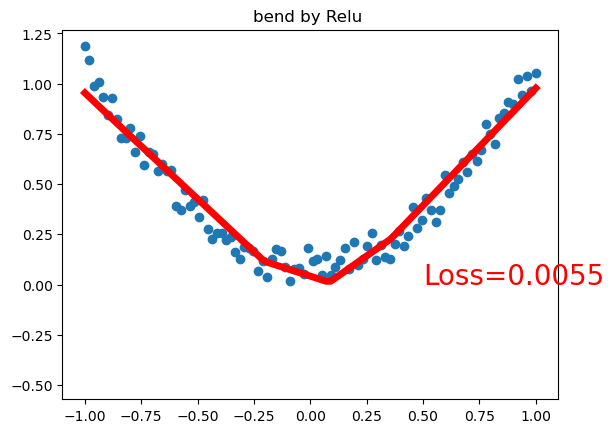

In [4]:
"""
View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
torch: 0.4
matplotlib
"""
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        # x = self.hidden(x)
        x = self.predict(x)             # linear output
        return x
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

# 保存动画为GIF文件
fig, ax = plt.subplots()    #fig是整个图像，ax是子图
ax.clear()  # 清空当前轴的内容
ax.scatter(x.data.numpy(), y.data.numpy())
ax.set_title('bend by Relu ')
ims = []

for t in range(200):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    if t % 1 == 0:
        if t % 20 ==0:
            print('step:{}  loss{}'.format(t,loss.data.numpy()))
        line, = ax.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)  # 画出预测数据，红色，线宽为5
        text = ax.text(0.5, 0, f'Loss={loss.data.numpy():.4f}', fontdict={'size': 20, 'color': 'red'})  # 在图上显示损失
        ims.append([line, text])  # 将line和text对象作为列表添加到ims中

ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=2000)   #创建fig
print('making gif....')
ani.save('figs/relu.gif')    #保存为gif文件
#清空ims
ims.clear()
print('done!')


## <a id='toc1_3_'></a>[直接线性拟合作为对比-保存为GIF](#toc0_)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


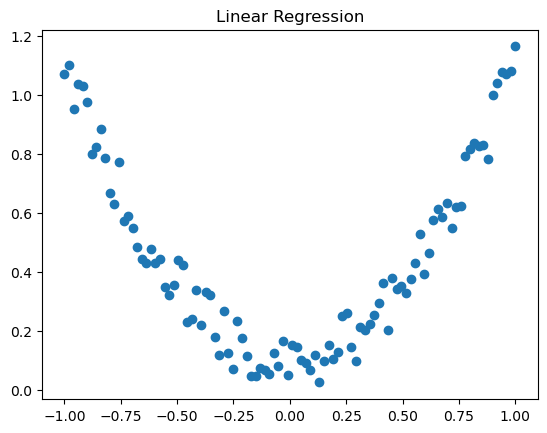

step:0  loss0.8763247728347778
step:20  loss0.10246980935335159
step:40  loss0.1024697944521904
step:60  loss0.1024697944521904
step:80  loss0.1024697944521904
step:100  loss0.10246980935335159
step:120  loss0.1024697944521904
step:140  loss0.1024697944521904
step:160  loss0.1024697944521904
step:180  loss0.1024697944521904
making gif....
done!


In [5]:
"""
View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
torch: 0.4
matplotlib
"""
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

import matplotlib.animation as animation
# import imageio
import os
# torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy(), y.data.numpy()) # 画出原始数据点
#fig加载原始数据点
# plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = self.hidden(x)   # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss


# 创建一个图像，用于动态展示

fig, ax = plt.subplots()    #fig是整个图像，ax是子图
ax.clear()  # 清空当前轴的内容
ax.scatter(x.data.numpy(), y.data.numpy())
#设定标题
ax.set_title('Linear Regression')
ims = []

for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 1 == 0:
        # plt.cla()   #   cla是clear axis的缩写，即清除当前图形中的当前活动轴。其他轴不受影响。
        # plt.scatter(x.data.numpy(), y.data.numpy()) # scater 画出散点图
        # plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)   # 画出预测数据，红色，线宽为5
        # plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})   #在图上显示损失
        plt.pause(0.01)  # 暂停0.1秒
        # 保存当前的图像状态
        if t % 20 ==0:
            print('step:{}  loss{}'.format(t,loss.data.numpy()))
        line, = ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=5)  # 画出预测数据，红色，线宽为5
        text = ax.text(0.5, 0, f'Loss={loss.data.numpy():.4f}', fontdict={'size': 20, 'color': 'red'})  # 在图上显示损失
        # 正确保存当前帧的图形对象
        ims.append([line, text])  # 将line和text对象作为列表添加到ims中

# 保存动画为GIF文件
# fig, ax = plt.subplots()    #fig是整个图像，ax是子图
# ax.clear()  # 清空当前轴的内容
# ax.scatter(x.data.numpy(), y.data.numpy())

# plt.cla()   #   cla是clear axis的缩写，即清除当前图形中的当前活动轴。其他轴不受影响。
#清空
# if os.path.exists('None_activation.gif'):
#     os.remove('None_activation.gif')
# plt.scatter(x.data.numpy(), y.data.numpy()) # scater 画出散点图        
ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)   #fig是图像，ims是图像列表，interval是每帧之间的间隔，单位是毫秒，repeat_delay是重复播放的延迟时间，单位是毫秒
print('making gif....')
#保存为gif文件，如果存在则先删除
ani.save('figs/None_activation.gif')    #保存为gif文件
#清空ims
ims.clear()
print('done!')


## <a id='toc1_4_'></a>[常见Loss函数](#toc0_)

L1、L2、smoothL1


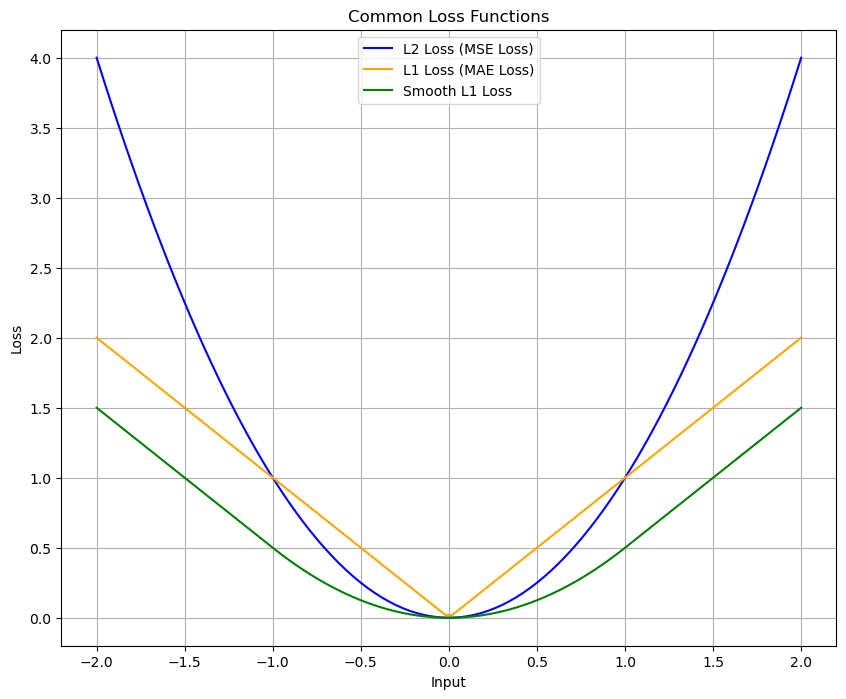

In [6]:
# 画出L2损失
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
# def L1_loss(x,y):
#     return abs(x-y)
# def MSELoss(x,y):
#     return (x-y)**2
#造点数据
x = torch.linspace(-2, 2, 100) #-2到2之间取100个点
y_true = torch.zeros_like(x)  # 假设目标值为0

# 计算各种损失函数
mse_loss = F.mse_loss(x, y_true, reduction='none')
l1_loss = F.l1_loss(x, y_true, reduction='none')
smooth_l1_loss = F.smooth_l1_loss(x, y_true, reduction='none')
# bce_loss = F.binary_cross_entropy_with_logits(x, y_true, reduction='none')
# hinge_loss = F.hinge_embedding_loss(x, y_true, reduction='none')
# cross_entropy_loss = F.cross_entropy(x, y_true, reduction='none') 要求x是2维度，y_true是1维度

# 绘制损失函数
plt.figure(figsize=(10, 8))
plt.plot(x.numpy(), mse_loss.numpy(), label='L2 Loss (MSE Loss)', color='blue')
plt.plot(x.numpy(), l1_loss.numpy(), label='L1 Loss (MAE Loss)', color='orange')
plt.plot(x.numpy(), smooth_l1_loss.numpy(), label='Smooth L1 Loss', color='green')
# plt.plot(x.numpy(), bce_loss.numpy(), label='Binary Cross Entropy Loss', color='red')
# plt.plot(x.numpy(), hinge_loss.numpy(), label='Hinge Loss', color='purple')
# plt.plot(x.numpy(), cross_entropy_loss.numpy(), label='Cross Entropy Loss', color='cyan')

# 添加图例和标签
plt.title('Common Loss Functions')
plt.xlabel('Input')
plt.ylabel('Loss')
plt.legend(loc='upper center')
plt.grid(True)
plt.show()

## 平滑的L1损失

$$\text { Smooth L1 Loss }= \begin{cases}0.5 \times\left(y_i-\hat{y}_i\right)^2 & \text { if }\left|y_i-\hat{y}_i\right|<1 \\ \left|y_i-\hat{y}_i\right|-0.5 & \text { otherwise }\end{cases}$$

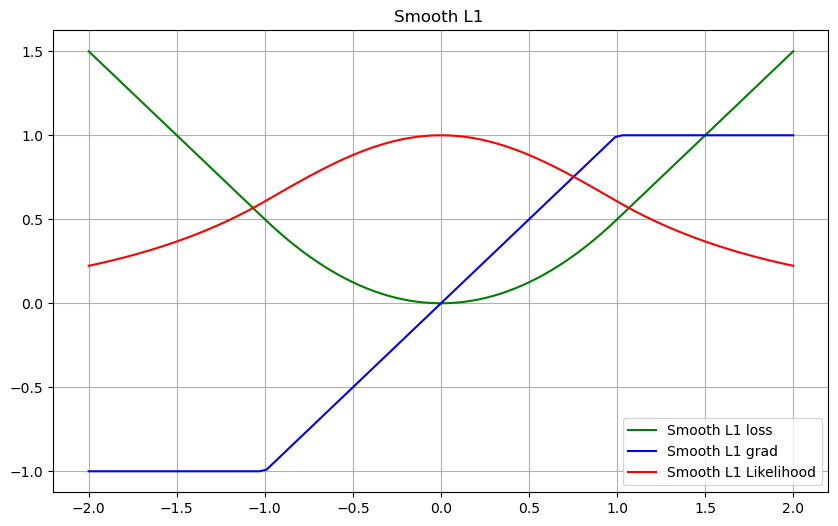

In [7]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 生成数据
x = torch.linspace(-2, 2, 100, requires_grad=True)
y_true = torch.zeros_like(x)  # 假设目标值为0

# 计算Smooth L1 Loss
smooth_l1_loss = F.smooth_l1_loss(x, y_true, reduction='none')

# 计算似然函数（exp(-loss)）
likelihood = torch.exp(-smooth_l1_loss)

# 计算Smooth L1 Loss的导数（梯度）
smooth_l1_loss.sum().backward()
smooth_l1_grad = x.grad.clone()

# 绘制Smooth L1 Loss、似然函数及其导数
plt.figure(figsize=(10, 6))

# 绘制Smooth L1 Loss
plt.plot(x.detach().numpy(), smooth_l1_loss.detach().numpy(), label='Smooth L1 loss', color='green')
plt.plot(x.detach().numpy(), smooth_l1_grad.numpy(), label='Smooth L1 grad', color='blue')
plt.plot(x.detach().numpy(), likelihood.detach().numpy(), label='Smooth L1 Likelihood', color='red')
plt.title('Smooth L1 ')
plt.grid(True)
plt.legend()
plt.show()
